# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [166]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import requests
import json
import datetime
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [167]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [168]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?'

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units=imperial&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=e00d34db07a7e554f45cc2dddc27d4e7&units=imperial&q=


In [169]:

# Define an empty list to fetch the weather data for each city
city_data = []


In [170]:
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = round(city_weather['coord']['lat'], 2)
        city_lng = round(city_weather['coord']['lon'],2 )
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hawaiian paradise park
Processing Record 2 of Set 1 | petropavlovsk-kamchatsky
Processing Record 3 of Set 1 | aldinga beach
Processing Record 4 of Set 1 | kolonia
Processing Record 5 of Set 1 | alofi
Processing Record 6 of Set 1 | sao joao da barra
Processing Record 7 of Set 1 | as sulayyil
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | carutapera
Processing Record 10 of Set 1 | qapqal
City not found. Skipping...
Processing Record 11 of Set 1 | igarka
Processing Record 12 of Set 1 | whitehorse
Processing Record 13 of Set 1 | chingola
Processing Record 14 of Set 1 | nagato
Processing Record 15 of Set 1 | road town
Processing Record 16 of Set 1 | bilibino
Processing Record 17 of Set 1 | grytviken
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | san francisco de la paz
Processing Record 20 of Set 1 | puerto san carlos
City not found. Skipping

In [171]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hawaiian paradise park,19.59,-154.97,78.31,88,75,3.44,US,1697607647
1,petropavlovsk-kamchatsky,53.05,158.65,43.45,88,100,8.95,RU,1697607583
2,aldinga beach,-35.28,138.46,84.25,34,0,3.56,AU,1697607647
3,kolonia,50.93,6.95,44.96,76,0,6.91,DE,1697607647
4,alofi,-19.06,-169.92,73.29,60,67,16.11,NU,1697607647


In [172]:
# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [173]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hawaiian paradise park,19.59,-154.97,78.31,88,75,3.44,US,1697607647
1,petropavlovsk-kamchatsky,53.05,158.65,43.45,88,100,8.95,RU,1697607583
2,aldinga beach,-35.28,138.46,84.25,34,0,3.56,AU,1697607647
3,kolonia,50.93,6.95,44.96,76,0,6.91,DE,1697607647
4,alofi,-19.06,-169.92,73.29,60,67,16.11,NU,1697607647


In [174]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [175]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hawaiian paradise park,19.59,-154.97,78.31,88,75,3.44,US,1697607647
1,petropavlovsk-kamchatsky,53.05,158.65,43.45,88,100,8.95,RU,1697607583
2,aldinga beach,-35.28,138.46,84.25,34,0,3.56,AU,1697607647
3,kolonia,50.93,6.95,44.96,76,0,6.91,DE,1697607647
4,alofi,-19.06,-169.92,73.29,60,67,16.11,NU,1697607647


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

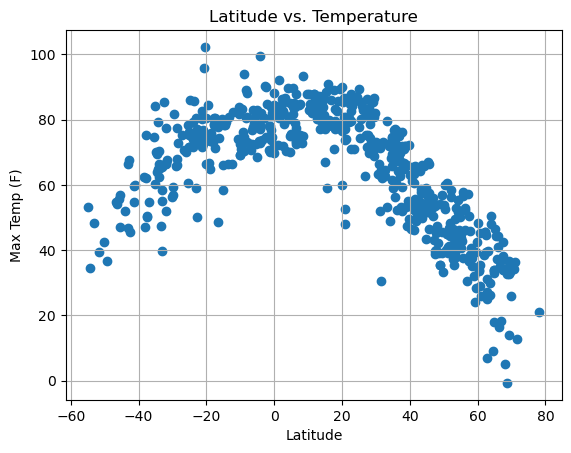

In [176]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Temperature")
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

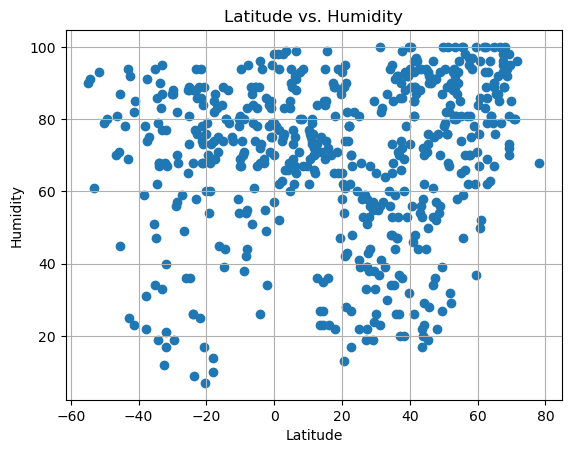

In [177]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

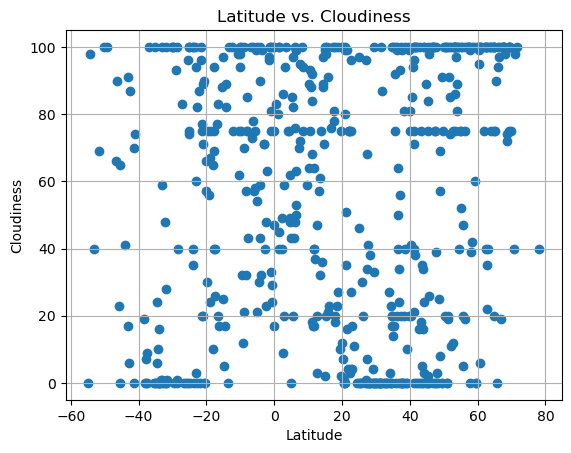

In [178]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

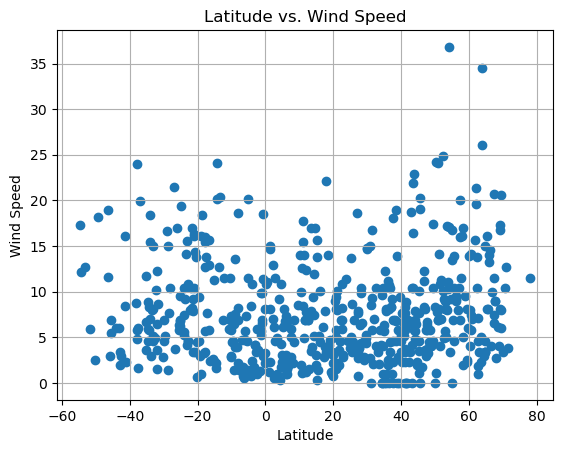

In [179]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [180]:
# Define a function to create Linear Regression plots
def lin_regress(x, y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(0,50),fontsize=15,color="red")
    print(f"The r-squared is: {rvalue**2}")
    print(line_eq)

In [181]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# northern_hemi_df = pd.DataFrame()
northern_hemi_df = city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hawaiian paradise park,19.59,-154.97,78.31,88,75,3.44,US,1697607647
1,petropavlovsk-kamchatsky,53.05,158.65,43.45,88,100,8.95,RU,1697607583
3,kolonia,50.93,6.95,44.96,76,0,6.91,DE,1697607647
6,as sulayyil,20.46,45.58,80.85,13,0,8.93,SA,1697607648
9,igarka,67.47,86.58,33.80,98,100,20.69,RU,1697607648


In [182]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']<=0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,aldinga beach,-35.28,138.46,84.25,34,0,3.56,AU,1697607647
4,alofi,-19.06,-169.92,73.29,60,67,16.11,NU,1697607647
5,sao joao da barra,-21.64,-41.05,76.17,86,100,8.25,BR,1697607648
7,adamstown,-25.07,-130.10,71.47,89,100,6.29,PN,1697607648
8,carutapera,-1.20,-46.02,78.17,84,100,5.64,BR,1697607648


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.776143576458998
y = -0.88x + 90.11


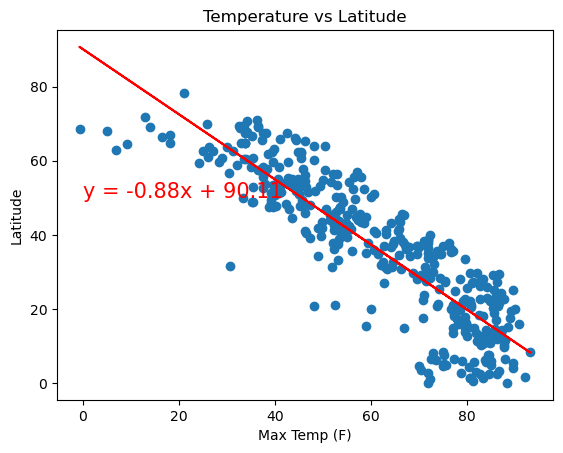

In [183]:
# Linear regression on Northern Hemisphere
lin_regress(northern_hemi_df['Max Temp'], northern_hemi_df['Lat'])
plt.xlabel('Max Temp (F)')
plt.ylabel('Latitude')
plt.title('Temperature vs Latitude')
plt.show()

The r-squared is: 0.4585372702981418
y = 0.78x + -76.83


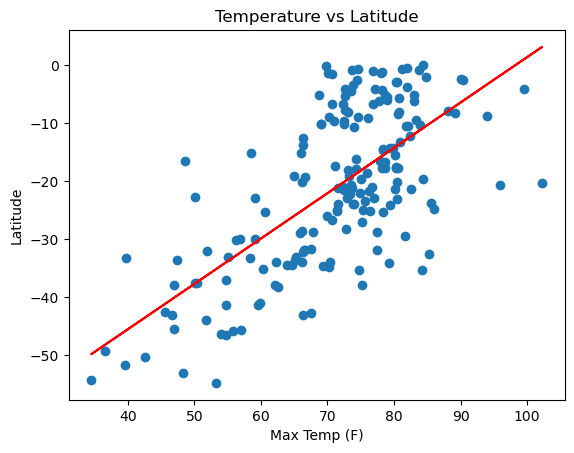

In [184]:
# Linear regression on Southern Hemisphere
lin_regress(southern_hemi_df['Max Temp'], southern_hemi_df['Lat'])
plt.xlabel('Max Temp (F)')
plt.ylabel('Latitude')
plt.title('Temperature vs Latitude')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.03419670448252121
y = 0.16x + 25.13


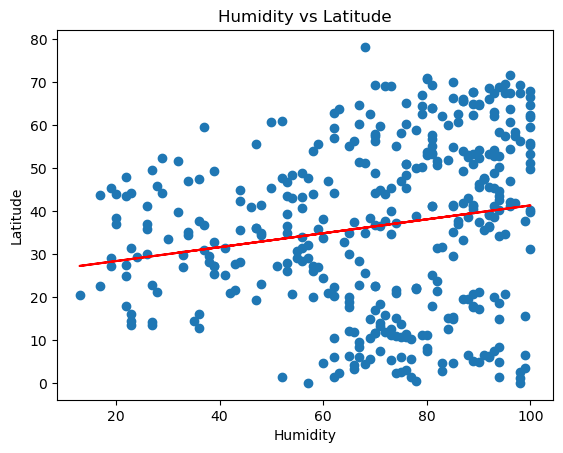

In [185]:
# Northern Hemisphere
lin_regress(northern_hemi_df['Humidity'], northern_hemi_df['Lat'])
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.title('Humidity vs Latitude')
plt.show()

The r-squared is: 0.007327516782357273
y = 0.05x + -24.88


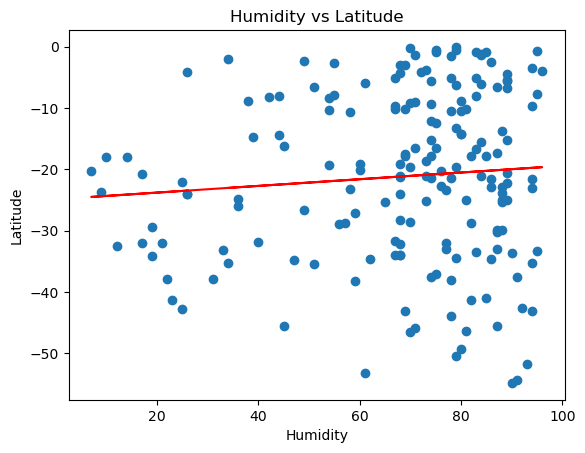

In [186]:
# Southern Hemisphere
lin_regress(southern_hemi_df['Humidity'], southern_hemi_df['Lat'])
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.title('Humidity vs Latitude')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.029519335245260604
y = 0.08x + 31.84


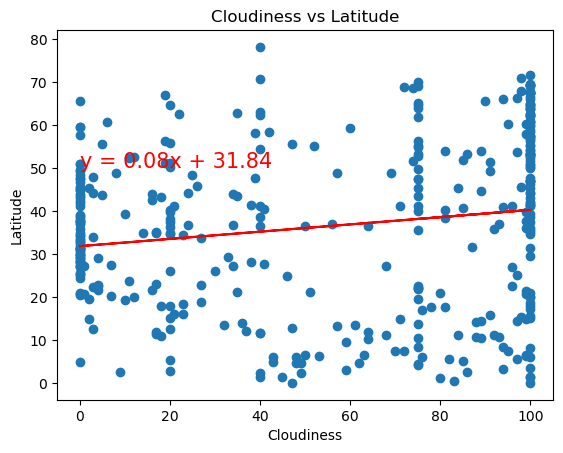

In [187]:
# Northern Hemisphere
lin_regress(northern_hemi_df['Cloudiness'], northern_hemi_df['Lat'])
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.title('Cloudiness vs Latitude')
plt.show()

The r-squared is: 0.07272376158902616
y = 0.1x + -26.48


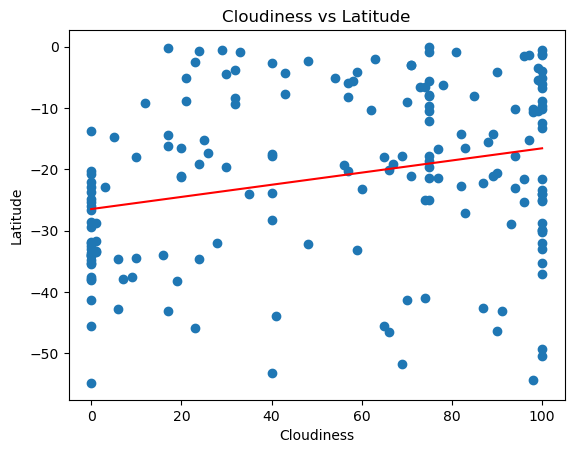

In [188]:
# Southern Hemisphere
lin_regress(southern_hemi_df['Cloudiness'], southern_hemi_df['Lat'])
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.title('Cloudiness vs Latitude')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.053431119919603275
y = 0.81x + 30.53


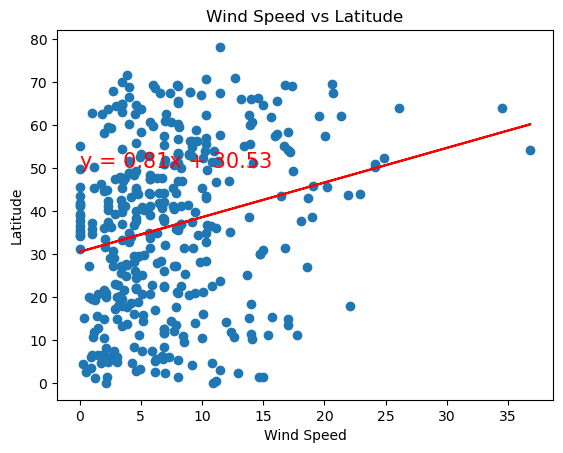

In [189]:
# Northern Hemisphere
lin_regress(northern_hemi_df['Wind Speed'], northern_hemi_df['Lat'])
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.title('Wind Speed vs Latitude')
plt.show()

The r-squared is: 0.031077404362739983
y = -0.44x + -17.65


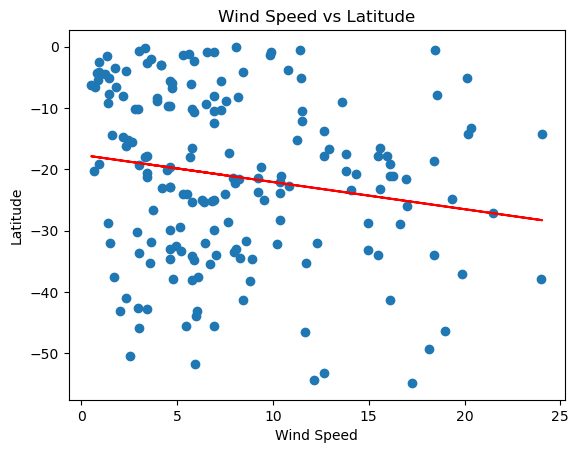

In [190]:
# Southern Hemisphere
lin_regress(southern_hemi_df['Wind Speed'], southern_hemi_df['Lat'])
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.title('Wind Speed vs Latitude')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [191]:
# Northern Hemisphere: Temperature vs. Latitude - The linear regression is evaluating the relationship between the location of each city in the northern hemisphere from the equator and the relative maximum temperature. There is a borderline strong inverse correlation between distance from the equator and maximum temperature.

# Southern Hemisphere: Temperature vs. Latitude - The linear regression is evaluating the relationship between the location of each city in the southern hemisphere from the equator and the relative maximum temperature. There is a borderline strong inverse correlation between distance from the equator and maximum temperature.

# Northern Hemisphere: Humidity vs. Latitude - The linear regression is evaluating the relationship between the location of each city in the northern hemisphere from the equator and the relative humidity. There is no correlation between distance from the equator and humidity.

# Southern Hemisphere: Humidity vs. Latitude - The linear regression is evaluating the relationship between the location of each city in the southern hemisphere from the equator and the relative humidity. There is no correlation between distance from the equator and humidity.

# Northern Hemisphere: Cloudiness vs. Latitude - The linear regression is evaluating the relationship between the location of each city in the northern hemisphere from the equator and the relative incidence of cloudiness. There is no correlation between distance from the equator and cloudiness.

# Southern Hemisphere: Cloudiness vs. Latitude - The linear regression is evaluating the relationship between the location of each city in the southern hemisphere from the equator and the relative incidence of cloudiness. There is no correlation between distance from the equator and cloudiness.

# Northern Hemisphere: Wind Speed vs. Latitude - The linear regression is evaluating the relationship between the location of each city in the northern hemisphere from the equator and the relative wind speed. There is no correlation between distance from the equator and wind speed.

# Southern Hemisphere: Wind Speed vs. Latitude - The linear regression is evaluating the relationship between the location of each city in the southern hemisphere from the equator and the relative wind speed. There is no correlation between distance from the equator and wind speed.